# IC customer profiling

## 1. Importing libraries and dataframes

In [44]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

path = r'C:\Users\User\Instacart Basket Analysis'
df_orders_products_all=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

## 2. The dataframe "df_orders_products_all" does not contain the personally identifiable information PII because I deleted the columns 'First Name', 'Last Name', 'Gender', and 'date_joined'

## 3. Creating a “Region” column

### I will create a new dataframe "df" with one column 'STATE' from the dataframe "df_orders_products_all". Then I will create a new column 'Region' by the defined function. In conclusion I will add that column to the main dataframe.

In [3]:
df = df_orders_products_all[['STATE']].copy()

#### Defining the function "reg" for creating the new column "Region"

In [4]:
def reg(row):
  if row['STATE'] == 'Maine':return 'Northeast'
  elif row['STATE'] == 'New Hampshire': return 'Northeast'
  elif row['STATE'] == 'Vermont': return 'Northeast'
  elif row['STATE'] == 'Massachusetts': return 'Northeast'
  elif row['STATE'] == 'Rhode Island': return 'Northeast'
  elif row['STATE'] == 'Connecticut': return 'Northeast'
  elif row['STATE'] == 'New York': return 'Northeast'
  elif row['STATE'] == 'Pennsylvania': return 'Northeast'
  elif row['STATE'] == 'New Jersey': return 'Northeast'
  elif row['STATE'] == 'Wisconsin': return 'Midwest'
  elif row['STATE'] == 'Michigan': return 'Midwest'
  elif row['STATE'] == 'Illinois': return 'Midwest'
  elif row['STATE'] == 'Indiana': return 'Midwest'
  elif row['STATE'] == 'Ohio': return 'Midwest'
  elif row['STATE'] == 'North Dakota': return 'Midwest'
  elif row['STATE'] == 'South Dakota': return 'Midwest'
  elif row['STATE'] == 'Nebraska': return 'Midwest'
  elif row['STATE'] == 'Kansas': return 'Midwest'
  elif row['STATE'] == 'Minnesota': return 'Midwest'
  elif row['STATE'] == 'Iowa': return 'Midwest'
  elif row['STATE'] == 'Missouri': return 'Midwest'
  elif row['STATE'] == 'Delaware': return 'South'
  elif row['STATE'] == 'Maryland': return 'South'
  elif row['STATE'] == 'District of Columbia': return 'South'
  elif row['STATE'] == 'Virginia': return 'South'
  elif row['STATE'] == 'West Virginia': return 'South'
  elif row['STATE'] == 'North Carolina': return 'South'
  elif row['STATE'] == 'South Carolina': return 'South'
  elif row['STATE'] == 'Georgia': return 'South'
  elif row['STATE'] == 'Florida': return 'South'
  elif row['STATE'] == 'Kentucky': return 'South'
  elif row['STATE'] == 'Tennessee': return 'South'
  elif row['STATE'] == 'Mississippi': return 'South'
  elif row['STATE'] == 'Alabama': return 'South'
  elif row['STATE'] == 'Oklahoma': return 'South'
  elif row['STATE'] == 'Texas': return 'South'
  elif row['STATE'] == 'Arkansas': return 'South'
  elif row['STATE'] == 'Louisiana': return 'South'
  elif row['STATE'] == 'Idaho': return 'West'
  elif row['STATE'] == 'Montana': return 'West)'
  elif row['STATE'] == 'Wyoming': return 'West)'
  elif row['STATE'] == 'Nevada': return 'West)'  
  elif row['STATE'] == 'Utah': return 'West)'
  elif row['STATE'] == 'Colorado': return 'West)'  
  elif row['STATE'] == 'Arizona': return 'West)'
  elif row['STATE'] == 'New Mexico': return 'West)'
  elif row['STATE'] == 'Alaska': return 'West)'
  elif row['STATE'] == 'Washington': return 'West)'
  elif row['STATE'] == 'Oregon': return 'West)'
  elif row['STATE'] == 'California': return 'West)'
  elif row['STATE'] == 'Hawaii': return 'West)'  
  else: return np.nan


In [5]:
df['Region'] = df.apply(reg, axis = 1)

#### I used the Python defined function "reg" and got the dataframe "df" with columns 'STATE' and 'Region'. 

In [52]:
df.head()

,STATE,Region
0,Missouri,Midwest
1,Missouri,Midwest
2,Missouri,Midwest
3,Missouri,Midwest
4,Missouri,Midwest


In [53]:
df.shape

(32404859, 2)

In [10]:
df.isnull().sum() 

STATE     0
Region    0
dtype: int64

#### The test  shows no missing data

In [72]:
# Export as .pkl
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'states_regions.pkl'))

### Add the column 'Region' from df to  df_orders_products_all

In [56]:
df_orders_products_all['region'] = df['Region']

In [57]:
df_orders_products_all.head()

,user_id,STATE,Age,n_dependants,fam_status,income,product_id,product_name,aisle_id,department_id,...,add_to_cart_order,reordered,max_order,loyalty_flag,average_price,spender_flag,median_freq,freq_Flag,_merge,region
0,26711,Missouri,48,3,married,165665,196,Soda,77,7,...,2,0,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
1,26711,Missouri,48,3,married,165665,196,Soda,77,7,...,1,1,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
2,26711,Missouri,48,3,married,165665,196,Soda,77,7,...,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
3,26711,Missouri,48,3,married,165665,6184,Clementines,32,4,...,1,0,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
4,26711,Missouri,48,3,married,165665,6184,Clementines,32,4,...,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest


In [58]:
df_orders_products_all['region'].value_counts(dropna = False) 

region
South        10791885
West)         7685794
Midwest       7597325
Northeast     5722736
West           607119
Name: count, dtype: int64

####  I see errors - 'West)' - can be West. I fixed it.

In [60]:
df_orders_products_all.loc[df_orders_products_all['region'] == 'West)', ['region']] = 'West'

In [61]:
df_orders_products_all['region'].value_counts(dropna = False) 

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [62]:
df_orders_products_all['spender_flag'].value_counts(dropna = False) 

spender_flag
Low spender     31770614
High spender      634245
Name: count, dtype: int64

### The final dataframe is df_orders_products_region

In [63]:
df_orders_products_region = df_orders_products_all

In [64]:
# Export the new dataframe df_orders_products_region as .pkl
df_orders_products_region.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_region.pkl'))

## Spending habits in different U.S. regions

#### Crosstab for 'region' and 'spender_flag' 

In [65]:
a=df_orders_products_region['region']
b=df_orders_products_region['spender_flag']
df_cross = pd.crosstab(a, b, rownames=["a"], colnames=["b"])

In [66]:
df_cross

b,High spender,Low spender
a,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


###  

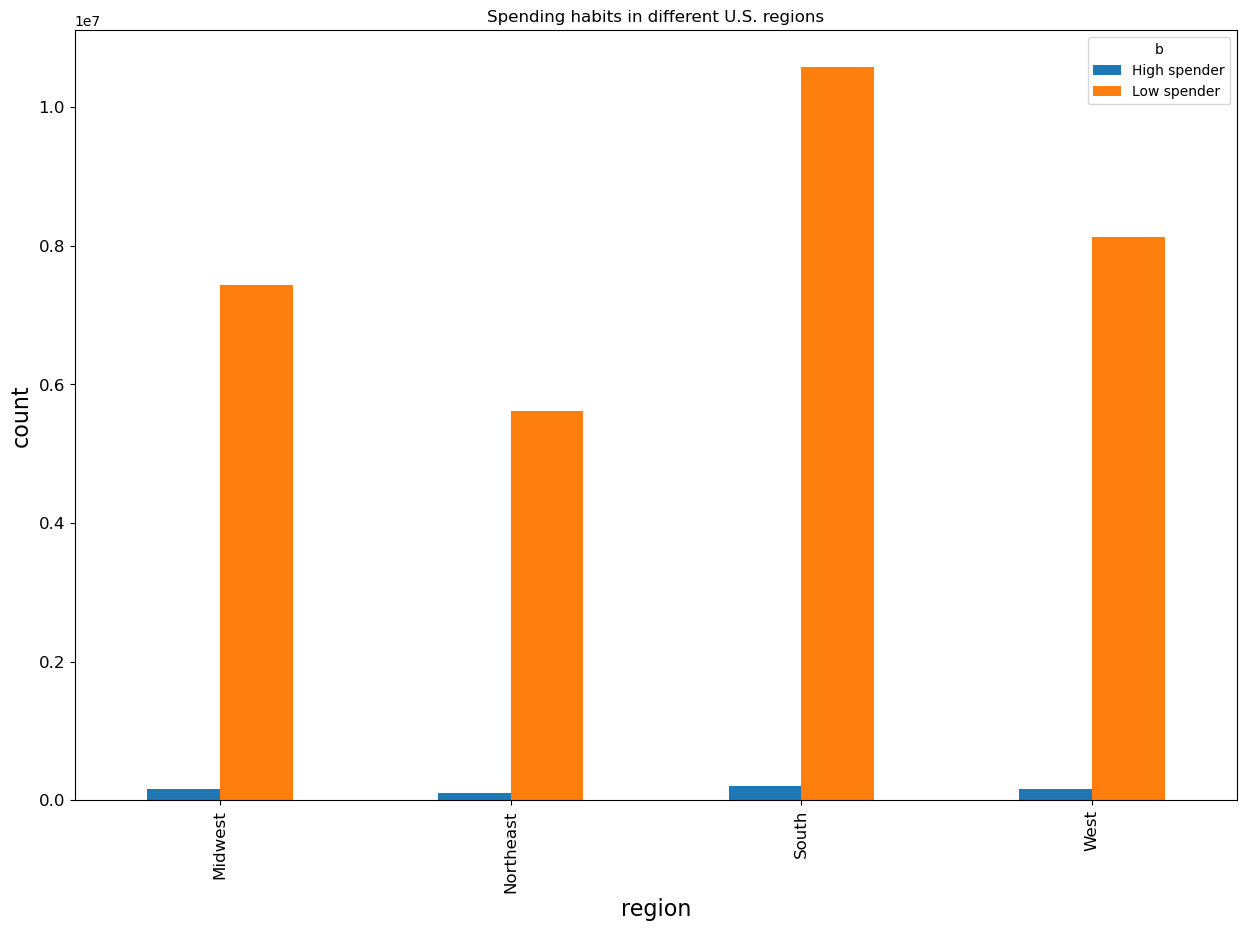

In [71]:
ax = df_cross[['High spender','Low spender']].plot(kind='bar', title ="Spending habits in different U.S. regions", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("region", fontsize=16)
ax.set_ylabel("count", fontsize=16)
plt.show()

###  We see that in all regions the count of High spenders is much lower than the count of low spenders. The South region has a bigger general count of buyers.  